Load file and remove background signal

In [ ]:
%load_ext autoreload
%autoreload 2

Performing background subtraction...
Successfully subtracted background.


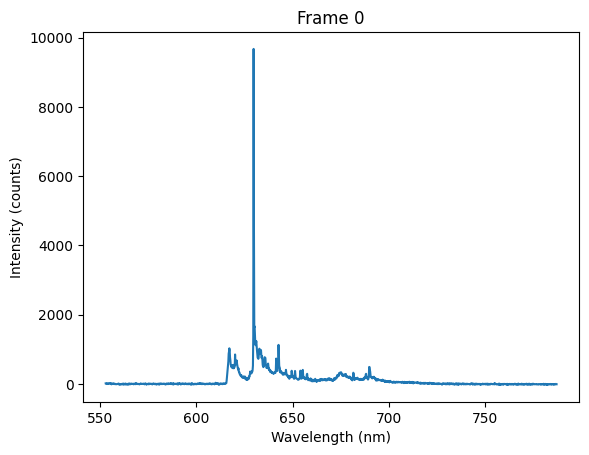

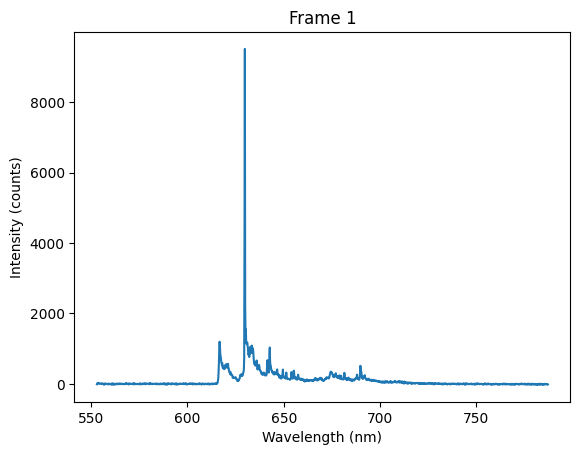

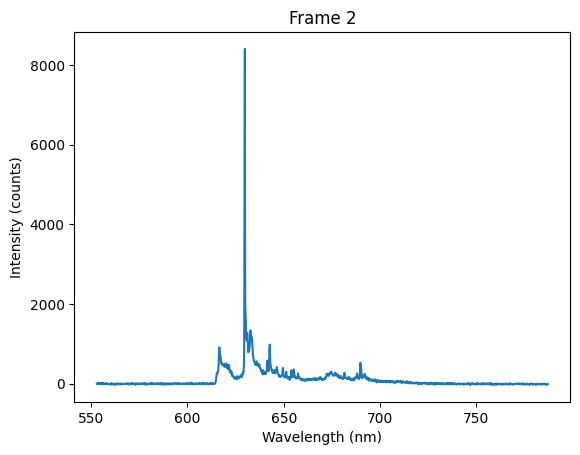

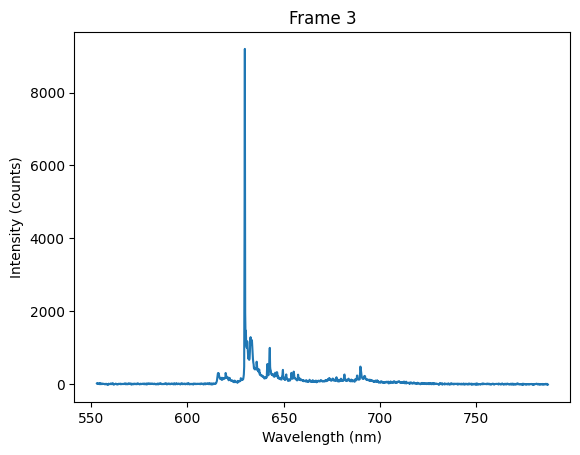

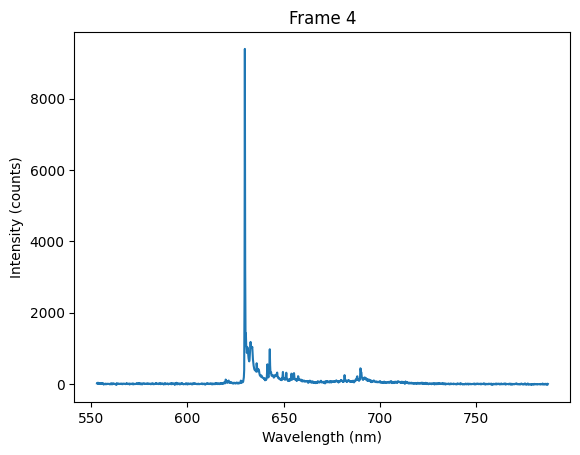

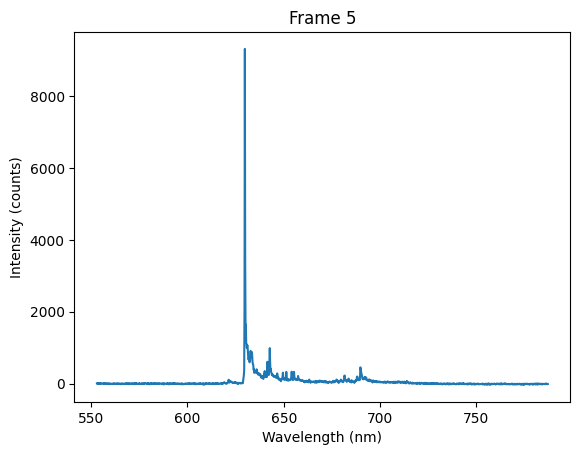

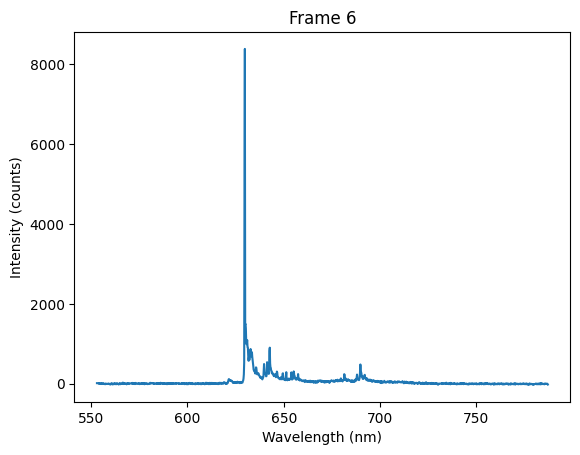

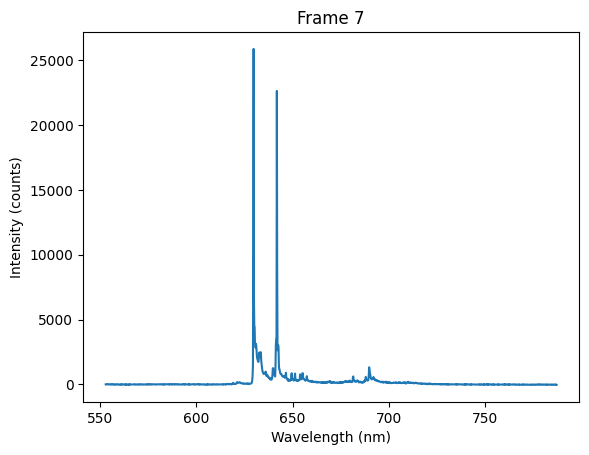

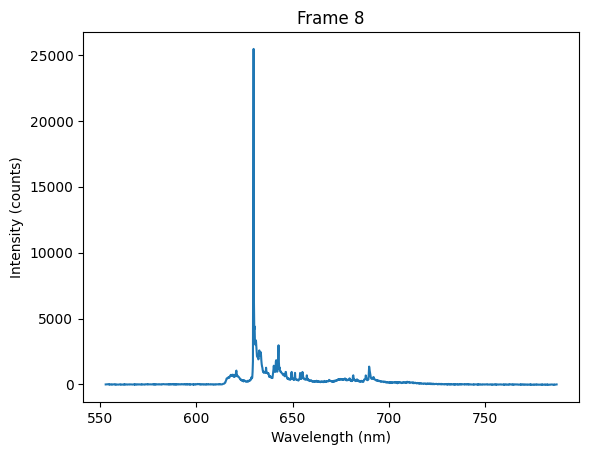

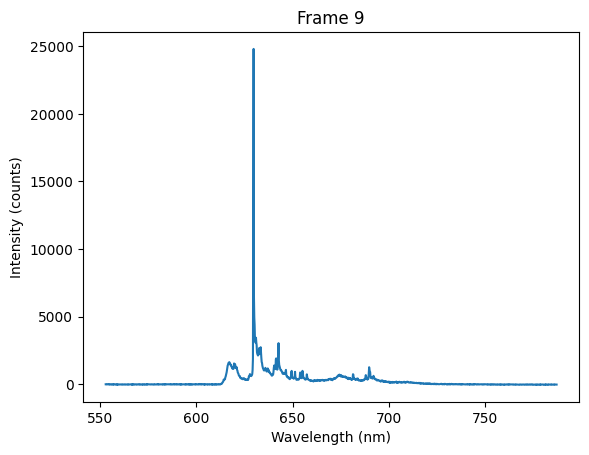

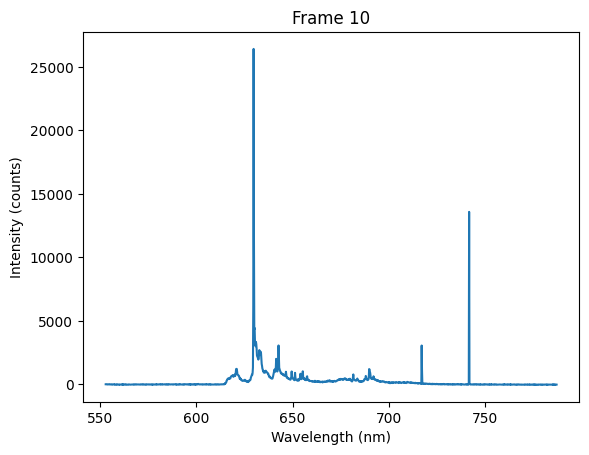

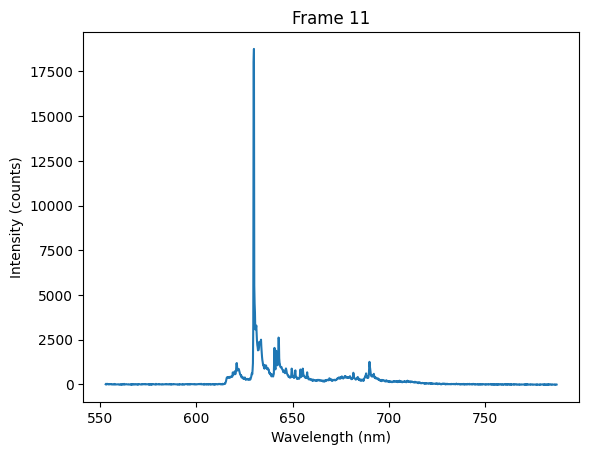

In [11]:
from pathlib import Path

import hbn_pl.io as io
import hbn_pl.preprocess as preprocess
import hbn_pl.plot as plot
import hbn_pl.peaks as peaks
import hbn_pl.energy as energy

DATA_DIR = 'C:\\Users\\ech77\\OneDrive - University of Cambridge\\Data for IBS November 2025\\Sample 5\\PL spectra'
DATA_DIR = Path(DATA_DIR)
FILE_NAME = '2025-11-17 16_29_50 sample5_DCMd2_200uw_emitter6 2184.spe'
FILE_NAME = '2025-11-17 17_34_30 sample5_DCMd2_200uw_emitter11 2189.spe'
FILE_NAME = '2025-11-17 17_59_53 sample5_DCMd2_200uw_emitter17 2195.spe'
spe_path = DATA_DIR / FILE_NAME
wavelength, frames = io.load_spe(spe_path)
frames = frames[0:15]
frames = preprocess.background_subtract(frames, bg_slice=(1, 50))
plot.plot_frames(frames, wavelength)

Cosmic ray removal

Detecting cosmic ray frames...
Detected 2 cosmic ray frames: [7, 10]
Cosmic ray wavelengths: {7: [641.8502401788131], 10: [741.6555044814538, 717.0189181227256]}
Cosmic ray detection complete.


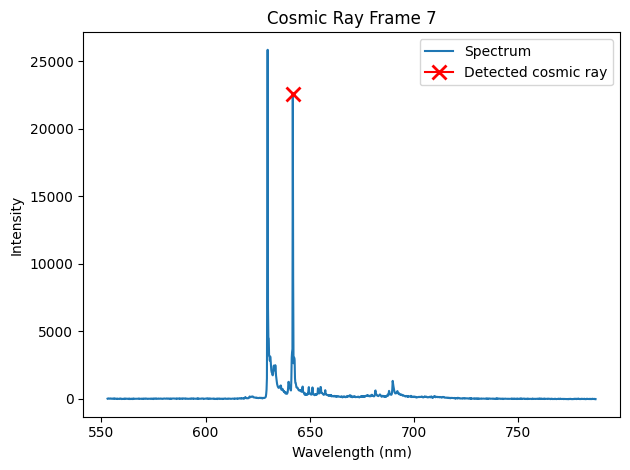

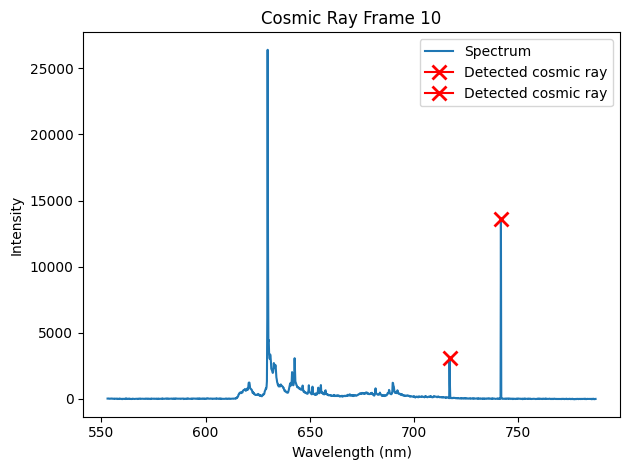

Removing cosmic rays from 2 frames: [7, 10]


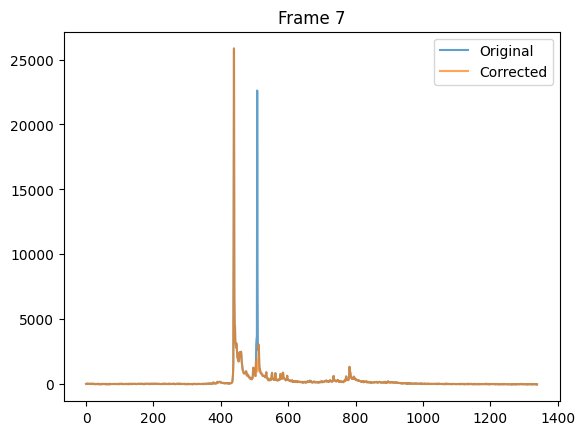

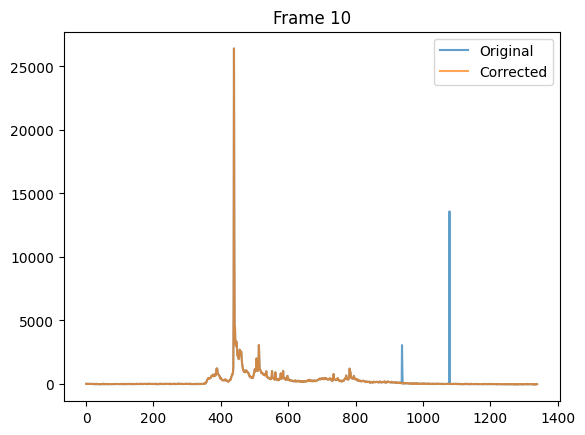

Cosmic ray removal complete.


In [12]:
cosmic_frames, cosmic_location = preprocess.detect_cosmic_frames(frames, wavelength, 
    prominence_threshold=0.05, fwhm_threshold=1.9, n_peaks=3, z_thresh=100, half_width=5, noise_width=30)
plot.plot_cosmic_frames(frames, wavelength, cosmic_location)
frames_cleaned = preprocess.remove_cosmic_rays2(frames, wavelength, cosmic_frames, cosmic_location, sigma=1.5, half_width = 5)

Bad frame removal

In [ ]:
drop_fraction = 0.6
bad_frames = preprocess.detect_bad_frames_simple(frames, drop_fraction = drop_fraction)
#bad_frames = preprocess.detect_bad_frames_complex(frames, window = 5, drop_fraction = drop_fraction)
#frames = preprocess.remove_frames(frames, bad_frames)

Average and normalise

In [ ]:
avg, avg_norm = preprocess.average_and_normalise(frames)
plot.plot_spectrum(wavelength, avg_norm)

## Peak finding

In [ ]:
import hbn_pl.peaks2 as peaks2
import hbn_pl.classification2 as classification

In [ ]:
finder = peaks2.PeakFinder(wavelength, avg_norm)

finder.peak_finding(prominence=0.1)

peaks = finder.extract_peak_parameters()

print("Detected peaks:")
for p in peaks:
    print(p)

finder.plot_peaks()


## Classification

In [ ]:
classifier = classification.ZPLClassification(peaks, thresholds={
            "max_fwhm": 0.9,           
            "min_prominence": 0.5,   
            "location_range": [615, 640]    
        })

result = classifier.classify()

print(result)

